<a href="https://colab.research.google.com/github/gasparfj/NeuronalNetwork_ParkinsonSeverity_Prediction/blob/main/PAC2_GFJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PAC 1: ACTIVIDAD

Gaspar Fuster Jimenez

Machine Learning

In [30]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 1. Leer el fichero de datos parkinsons_updrs.data



In [19]:
from google.colab import files
uploaded = files.upload() # Importar el fichero del enundiado

Saving parkinsons_updrs.data to parkinsons_updrs (1).data


In [20]:
data = pd.read_csv('parkinsons_updrs.data', sep=',') # Leer el archivo

## 2. Realizar una estadística descriptiva univariante de las variables que incluya tablas y gráficos.

## 3. Estandarizar mediante la transformación min-max las 16 variables que representan medidas biomédicas de la voz. Mostrar graficamente la transformación de las variables.

TUTORIAL NORMALIZAR DATOS:

https://medium.com/@noyomedicen/como-normalizar-datos-con-python-4a967f3a04f8

In [21]:
voice_data = data.iloc[:, 6:] # Seleccionar datos para normalizar

scaler = MinMaxScaler() # Inicializar el escalador
voice_data_norm = scaler.fit_transform(voice_data) # Normalizar los datos

# Convertir a DataFrame
column_names = data.columns[6:]
voice_data_norm = pd.DataFrame(voice_data_norm, columns=column_names)

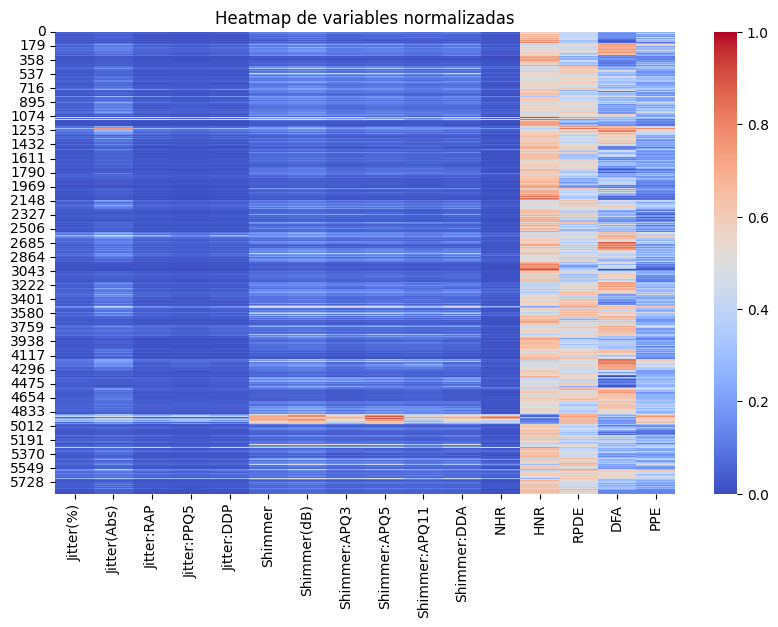

In [22]:
plt.figure(figsize=(10,6)) # Crear figura

sns.heatmap(voice_data_norm, cmap="coolwarm")  # Heatmap
plt.title("Heatmap de variables normalizadas") # Titulo
plt.show()                                     # Dibujar figura

## 4. Crear la variable binaria de severidad del Parkinson. Mostrar en una tabla el numero de observaciones por severidad del Parkinson.

In [23]:
# Crear la variable severidad (1 si hay severidad, 0 si no)
severidad = [1 if i > 25 else 0 for i in data['total_UPDRS']]
severidad = pd.DataFrame(severidad, columns = ['severidad']) # Convertir a df

## 5. Separar los datos en training (67%) y test (33%).

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    voice_data_norm, severidad, test_size=0.33, random_state=123)

## 6. Implementar una red neuronal profunda densa para la predicción de la severidad con dos capas ocultas de 10 y 10 nodos cada una. Adicionalmente, implementar una segunda red neuronal profunda densa con tres capas ocultas de 10, 20 y 10 nodos cada una.

Definir modelo

In [42]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=[16]),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

modelo2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=[16]),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilar modelo

In [43]:
modelo.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

modelo2.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

Entrenar

In [47]:
print('Entrenando...')
historial = modelo.fit(
    X_train, y_train, epochs=250, validation_data=(X_test, y_test)
)
historial2 = modelo2.fit(
    X_train, y_train, epochs=250, validation_data=(X_test, y_test)
)
print('Modelo entrenado')

Entrenando...
Epoch 1/250
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7528 - loss: 0.4873 - val_accuracy: 0.7432 - val_loss: 0.5105
Epoch 2/250
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7572 - loss: 0.4903 - val_accuracy: 0.7488 - val_loss: 0.5146
Epoch 3/250
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7548 - loss: 0.4884 - val_accuracy: 0.7478 - val_loss: 0.5075
Epoch 4/250
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7652 - loss: 0.4854 - val_accuracy: 0.7385 - val_loss: 0.5089
Epoch 5/250
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7561 - loss: 0.4830 - val_accuracy: 0.7463 - val_loss: 0.5181
Epoch 6/250
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7646 - loss: 0.4891 - val_accuracy: 0.7519 - val_loss: 0.5051
Epoch 7/250
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7537 - loss: 0.4862 - val_accuracy: 0.7437 - val_loss: 0.5070
Epoch 8/250
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7613 - loss: 0.4

Validar modelo

In [49]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f"Pérdida modelo 1: {loss:.4f}")
print(f"Accuracy modelo 1: {accuracy:.4f}")

loss2, accuracy2 = modelo2.evaluate(X_test, y_test)
print(f"Pérdida modelo 2: {loss2:.4f}")
print(f"Accuracy modelo 2: {accuracy2:.4f}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7493 - loss: 0.5136
Pérdida modelo 1: 0.5099
Accuracy modelo 1: 0.7468
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7552 - loss: 0.5195
Pérdida modelo 2: 0.5206
Accuracy modelo 2: 0.7468


Predicciones

In [50]:
y_pred = modelo.predict(X_test)
y_pred2 = modelo2.predict(X_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


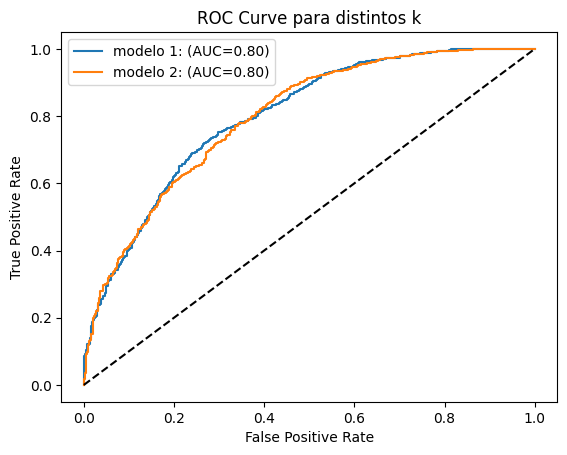

In [51]:
fpr, tpr, tresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr) # Calcular el area bajo la curva

fpr2, tpr2, tresholds2 = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2) # Calcular el area bajo la curva

plt.plot(fpr, tpr, label=f"modelo 1: (AUC={roc_auc:.2f})")
plt.plot(fpr2, tpr2, label=f"modelo 2: (AUC={roc_auc2:.2f})")
plt.plot([0,1],[0,1],'k--')  # Linea diagonal
plt.xlabel("False Positive Rate") # Titulo eje x
plt.ylabel("True Positive Rate") # Titulo eje y
plt.title("ROC Curve para distintos k") # Titulo del grafico
plt.legend() # Incluir leyenda
plt.show() # Mostrar el grafico

Text(0.5, 1.0, 'Matriz de confusion - Modelo 2')

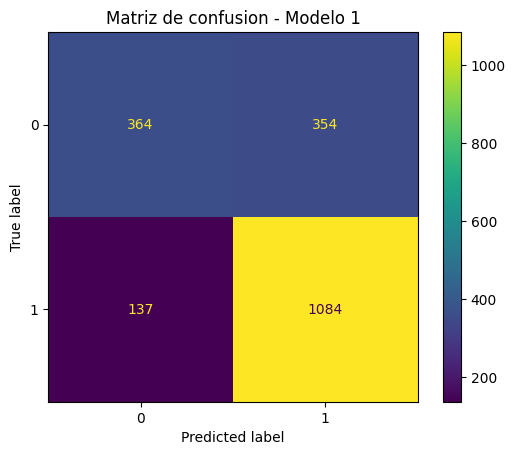

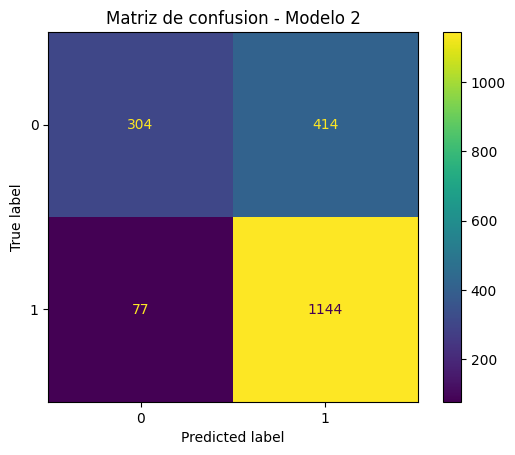

In [52]:
# Convertir las predicciones a clases
y_pred_classes = (y_pred > 0.5).astype(int)
y_pred2_classes = (y_pred2 > 0.5).astype(int)

# Dibujar matriz de confusion del modelo 1
cm = confusion_matrix(y_test, y_pred_classes)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Matriz de confusion - Modelo 1")

# Dibujar matriz de confusion del modelo 2
cm2 = confusion_matrix(y_test, y_pred2_classes)
ConfusionMatrixDisplay(confusion_matrix=cm2).plot()
plt.title("Matriz de confusion - Modelo 2")

## Bibliografia